# So sánh sự tăng trưởng của số lượng thí sinh trong vòng 5 năm

# Biến động của thí sinh dự thi qua từng năm

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến các file CSV
files = {
    2019: r'..\Data\diem_thi_2019.csv',
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}

# Tổng hợp dữ liệu
summary_data = []
for year, file in files.items():
    df = pd.read_csv(file)
    num_candidates = len(df)  # Đếm số lượng thí sinh
    summary_data.append({'year': year, 'num_candidates': num_candidates})

# Tạo DataFrame
data = pd.DataFrame(summary_data)

# Sắp xếp theo năm
data = data.sort_values('year')

# Tính % tăng trưởng
data['growth_rate'] = data['num_candidates'].pct_change() * 100

# Thay NaN bằng 0 cho năm đầu tiên
data['growth_rate'] = data['growth_rate'].fillna(0)

# Tạo biểu đồ cột bằng Plotly
fig = px.bar(
    data, 
    x='year', 
    y='num_candidates', 
    text='num_candidates', 
    title="Số lượng thí sinh qua các năm",
    labels={'num_candidates': 'Số lượng thí sinh', 'year': 'Năm'}
)

# Cập nhật tooltip hiển thị thêm thông tin
fig.update_traces(
    hovertemplate=(
        '<b>Năm:</b> %{x}<br>'
        '<b>Số lượng thí sinh:</b> %{y}<br>'
        '<b>% Tăng trưởng:</b> %{customdata:.2f}%'
    ),
    customdata=data['growth_rate'],  # Dữ liệu bổ sung
    texttemplate='%{y}',  # Hiển thị số lượng thí sinh trên cột
    textposition='outside'
)

# Cập nhật giao diện biểu đồ
fig.update_layout(
    yaxis_title="Số lượng thí sinh",
    xaxis_title="Năm",
    title_font_size=18,
    xaxis=dict(tickmode='linear'),
    hoverlabel=dict(font_size=12),
    bargap=0.2,  # Giảm khoảng cách giữa các cột
    bargroupgap=0.1  # Giảm khoảng cách giữa các nhóm cột (nếu có)
)

# Hiển thị biểu đồ
fig.show()


# Tăng trưởng về số lượng thí sinh theo từng vùng trên cả nước

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


files = {
    2019: r'..\Data\diem_thi_2019.csv',
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}
vietnam_regions_detailed = {
    "Đồng Bằng Sông Hồng": [
        'Hà Nội', 'Hải Phòng', 'Quảng Ninh', 'Hà Nam', 'Hưng Yên', 
        'Hải Dương', 'Nam Định', 'Thái Bình', 'Ninh Bình'
    ],
    "Trung Du và Miền Núi Bắc Bộ": [
        'Hà Giang', 'Cao Bằng', 'Lai Châu', 'Lào Cai', 'Tuyên Quang', 
        'Lạng Sơn', 'Bắc Kạn', 'Thái Nguyên', 'Yên Bái', 'Sơn La', 
        'Phú Thọ', 'Điện Biên', 'Hòa Bình', 'Vĩnh Phúc'
    ],
    "Bắc Trung Bộ và Duyên Hải Miền Trung": [
        'Thanh Hoá', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 
        'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 
        'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận'
    ],
    "Tây Nguyên": [
        'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng'
    ],
    "Đông Nam Bộ": [
        'TP. Hồ Chí Minh', 'Bà Rịa - Vũng Tàu', 'Bình Phước', 
        'Bình Dương', 'Tây Ninh', 'Đồng Nai', 'Ninh Thuận'
    ],
    "Đồng Bằng Sông Cửu Long": [
        'Long An', 'Đồng Tháp', 'An Giang', 'Tiền Giang', 'Kiên Giang', 
        'Cần Thơ', 'Bến Tre', 'Vĩnh Long', 'Trà Vinh', 'Sóc Trăng', 
        'Bạc Liêu', 'Cà Mau', 'Hậu Giang'
    ]
}


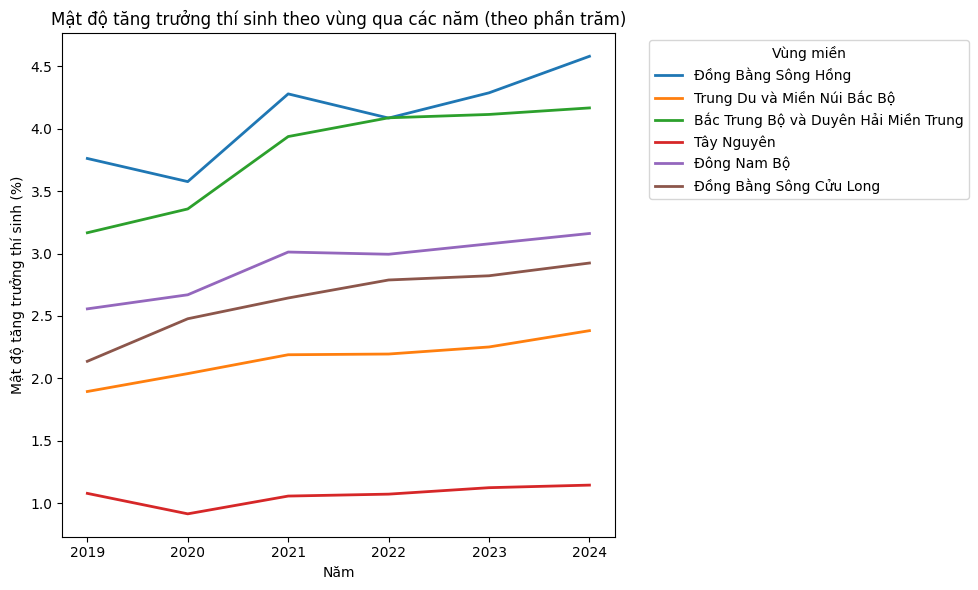

In [5]:

growth_data = []

# Đọc dữ liệu từ từng năm và xử lý
for year, file_path in files.items():
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(file_path)
    
    # Kiểm tra và lấy cột province hoặc province_name
    if 'province' not in df.columns and 'province_name' in df.columns:
        df.rename(columns={'province_name': 'province'}, inplace=True)

    # Tính toán số lượng thí sinh theo vùng
    for region, provinces in vietnam_regions_detailed.items():
        df_region = df[df['province'].isin(provinces)]
        num_candidates = df_region.shape[0]
        
        growth_data.append({
            'Year': year,
            'Region': region,
            'Candidates': num_candidates
        })

# Chuyển dữ liệu thành DataFrame
growth_df = pd.DataFrame(growth_data)

# Tính tổng số thí sinh qua tất cả các năm
total_candidates = growth_df['Candidates'].sum()

# Tính tỷ lệ phần trăm thí sinh theo vùng và năm
growth_df['Percentage'] = growth_df['Candidates'] / total_candidates * 100

# Vẽ biểu đồ mật độ tăng trưởng thí sinh theo phần trăm
plt.figure(figsize=(10, 6))

# Sử dụng lineplot thay cho kdeplot để vẽ các đường và hiển thị phần trăm
sns.lineplot(data=growth_df, x='Year', y='Percentage', hue='Region', lw=2)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Mật độ tăng trưởng thí sinh theo vùng qua các năm (theo phần trăm)')
plt.xlabel('Năm')
plt.ylabel('Mật độ tăng trưởng thí sinh (%)')

# Hiển thị chú thích đúng cách
plt.legend(title='Vùng miền', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Bảng thống kê của các tỉnh trong các vùng tương ứng

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm tính phần trăm thay đổi số lượng thí sinh từng tỉnh
def calculate_yearly_changes_percentage(files, provinces):
    province_data = []

    # Lặp qua từng file và năm
    for year, file_path in files.items():
        data = pd.read_csv(file_path)
        
        # Xác định cột 'Province' tùy theo năm
        data['Province'] = data['province' if year in [2020, 2021] else 'province_name'].str.strip()
        
        # Đếm số lượng thí sinh theo từng tỉnh
        province_counts = data['Province'].value_counts()

        # Lưu dữ liệu số lượng thí sinh cho từng tỉnh
        for province in provinces:
            count = province_counts.get(province, 0)
            province_data.append({'Province': province, 'Year': year, 'Count': count})

    df = pd.DataFrame(province_data)

    # Pivot để tạo bảng hàng = tỉnh, cột = năm, giá trị = số lượng thí sinh
    pivot_df = df.pivot(index='Province', columns='Year', values='Count').fillna(0)

    # Tính thay đổi phần trăm giữa các năm
    changes_df = pivot_df.pct_change(axis=1).fillna(0) * 100  # Tính thay đổi phần trăm
    changes_df = changes_df.rename(columns={year: f'diff_{year}' for year in changes_df.columns})  # Sửa tên cột

    # Thêm cột số lượng thí sinh cho từng tỉnh
    for year in pivot_df.columns:
        changes_df[f'count_{year}'] = pivot_df[year]

    return changes_df

### Đồng bằng Sông Cửu Long


In [7]:



provinces_in_region = vietnam_regions_detailed['Đồng Bằng Sông Cửu Long']


yearly_changes_percentage = calculate_yearly_changes_percentage(files, provinces_in_region)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

# Hiển thị bảng có màu
styled_df


Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
An Giang,0.000000,46.981096,-20.467222,53.250825,7.365134,1.549494,10368,15239,12120,18574,19942,20251
Bạc Liêu,0.000000,-3.438148,13.437109,1.151420,-0.483393,0.031338,5788,5589,6340,6413,6382,6384
Bến Tre,0.000000,6.026242,16.679926,-6.810606,-1.495813,0.231080,10670,11313,13200,12301,12117,12145
Cà Mau,0.000000,41.741433,13.365155,-2.132723,-8.567153,3.835925,6799,9637,10925,10692,9776,10151
Cần Thơ,0.000000,-3.794724,13.824192,0.618812,-1.098811,6.467125,11068,10648,12120,12195,12061,12841
Hậu Giang,0.000000,2.054073,17.306038,-3.959525,5.924569,4.670607,5696,5813,6819,6549,6937,7261
Kiên Giang,0.000000,-15.918312,10.270227,4.478156,0.684119,4.243223,14788,12434,13711,14325,14423,15035
Long An,0.000000,47.215136,18.231047,-6.436641,2.166960,0.753849,9408,13850,16375,15321,15653,15771
Sóc Trăng,0.000000,6.239082,13.131313,3.664867,0.600901,5.943255,8014,8514,9632,9985,10045,10642


### Đồng bằng Sông Hồng

In [8]:

provinces_in_region = vietnam_regions_detailed['Đồng Bằng Sông Hồng']


yearly_changes_percentage = calculate_yearly_changes_percentage(files, provinces_in_region)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

# Hiển thị bảng có màu
styled_df

Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
Hà Nam,0.000000,25.936261,12.827988,-5.085271,4.922139,-0.736897,6809,8575,9675,9183,9635,9564
Hà Nội,0.000000,-7.331461,27.869642,-3.863623,5.315550,5.653558,85099,78860,100838,96942,102095,107867
Hưng Yên,0.000000,1.123596,-3.309859,12.365461,10.810227,6.128948,12638,12780,12357,13885,15386,16329
Hải Dương,0.000000,-15.970822,13.838533,-8.392769,7.403780,6.528677,23305,19583,22293,20422,21934,23366
Hải Phòng,0.000000,-27.404129,25.554416,-3.738880,1.446493,12.353122,25529,18533,23269,22399,22723,25530
Nam Định,0.000000,35.277919,12.246210,-5.650742,3.217158,6.640529,13799,18667,20953,19769,20405,21760
Ninh Bình,0.000000,2.948074,20.002169,-5.079996,6.170841,5.381649,8955,9219,11063,10501,11149,11749
Quảng Ninh,0.000000,-18.495069,12.689902,-4.691027,2.566564,11.375975,17848,14547,16393,15624,16025,17848
Thái Bình,0.000000,16.932259,16.782360,-11.953671,3.474808,8.323339,16755,19592,22880,20145,20845,22580


### Bắc Trung Bộ và Duyên Hải Miền Trung

In [12]:
import numpy as np
middle_region = vietnam_regions_detailed["Bắc Trung Bộ và Duyên Hải Miền Trung"]

# Giả sử calculate_yearly_changes_percentage đã được định nghĩa và trả về DataFrame hợp lệ
yearly_changes_percentage = calculate_yearly_changes_percentage(files, middle_region)


yearly_changes_percentage = yearly_changes_percentage.replace([np.inf, -np.inf], np.nan)  # Thay thế Inf, -Inf bằng NaN
yearly_changes_percentage = yearly_changes_percentage.fillna(0)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

styled_df


Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
Bình Thuận,0.000000,13.539712,10.557239,5.679648,1.359315,1.806202,9594,10893,12043,12727,12900,13133
Bình Định,0.000000,-12.396179,-8.580232,19.840550,2.206718,2.354871,19264,16876,15428,18489,18897,19342
Hà Tĩnh,0.000000,13.586110,12.914816,0.109922,-0.317846,-1.420372,13477,15308,17285,17304,17249,17004
Khánh Hòa,0.000000,-0.334906,5.834733,1.205080,3.294118,-0.683371,13138,13094,13858,14025,14487,14388
Nghệ An,0.000000,7.619839,10.475669,6.516736,0.880648,-0.425636,28872,31072,34327,36564,36886,36729
Ninh Thuận,0.000000,14.569138,4.530348,-1.690094,4.187234,2.728312,4990,5717,5976,5875,6121,6288
Phú Yên,0.000000,-5.121446,-5.735265,14.463158,-1.912820,-0.412526,10622,10078,9500,10874,10666,10622
Quảng Bình,0.000000,18.646332,11.756427,-6.682898,0.476833,0.188037,8983,10658,11911,11115,11168,11189
Quảng Nam,0.000000,-48.797299,129.766484,0.071740,2.736125,0.552422,14218,7280,16727,16739,17197,17292


### Tây Nguyên

In [13]:

provinces_in_region = vietnam_regions_detailed['Tây Nguyên']


yearly_changes_percentage = calculate_yearly_changes_percentage(files, provinces_in_region)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

# Hiển thị bảng có màu
styled_df


Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
Gia Lai,0.000000,-12.210721,4.791588,0.874364,5.584369,2.287868,15167,13315,13953,14075,14861,15201
Kon Tum,0.000000,24.283647,8.011178,1.983614,6.300211,0.198886,3455,4294,4638,4730,5028,5038
Lâm Đồng,0.000000,-12.197502,5.082611,-0.571106,4.148348,4.663989,15372,13497,14183,14102,14687,15372
Đắk Lắk,0.000000,-28.133375,41.878810,2.845590,3.410655,-0.841175,19404,13945,19785,20348,21042,20865
Đắk Nông,0.000000,-11.886525,7.614295,2.498130,7.764156,4.022210,7050,6212,6685,6852,7384,7681


### Đông Nam Bộ

In [14]:


provinces_in_region = vietnam_regions_detailed['Đông Nam Bộ']


yearly_changes_percentage = calculate_yearly_changes_percentage(files, provinces_in_region)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

# Hiển thị bảng có màu
styled_df


Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
Bà Rịa - Vũng Tàu,0.000000,-8.851179,13.364216,-2.382421,2.085143,-2.243714,12552,11441,12970,12661,12925,12635
Bình Dương,0.000000,-16.285567,14.307044,-1.674990,11.104165,7.181038,13601,11386,13015,12797,14218,15239
Bình Phước,0.000000,-13.535032,6.118273,3.181643,2.130443,3.421775,11304,9774,10372,10702,10930,11304
Ninh Thuận,0.000000,14.569138,4.530348,-1.690094,4.187234,2.728312,4990,5717,5976,5875,6121,6288
TP. Hồ Chí Minh,0.000000,-14.394619,16.005158,-2.050552,0.301433,2.912164,86970,74451,86367,84596,84851,87322
Tây Ninh,0.000000,100.140548,13.014981,1.108119,4.773123,2.512465,4269,8544,9656,9763,10229,10486
Đồng Nai,0.000000,195.358562,7.559992,3.201711,5.723305,1.936184,9566,28254,30390,31363,33158,33800


### Trung Du và Miền Núi Bắc Bộ

In [15]:


provinces_in_region = vietnam_regions_detailed['Trung Du và Miền Núi Bắc Bộ']


yearly_changes_percentage = calculate_yearly_changes_percentage(files, provinces_in_region)


styled_df = yearly_changes_percentage.style.background_gradient(cmap="coolwarm", axis=None)

# Hiển thị bảng có màu
styled_df


Year,diff_2019,diff_2020,diff_2021,diff_2022,diff_2023,diff_2024,count_2019,count_2020,count_2021,count_2022,count_2023,count_2024
Province,,,,,,,,,,,,
Bắc Kạn,0.000000,-5.502154,1.648544,5.348516,-4.454635,8.810422,3017,2851,2898,3053,2917,3174
Cao Bằng,0.000000,141.364829,3.218791,6.257901,0.059488,9.116132,1905,4598,4746,5043,5046,5506
Hà Giang,0.000000,-18.684971,-0.159943,4.360983,7.214736,10.085905,6920,5627,5618,5863,6286,6920
Hòa Bình,0.000000,22.127319,3.693585,0.906313,1.201044,1.372549,7493,9151,9489,9575,9690,9823
Lai Châu,0.000000,-21.251194,8.126137,2.692092,4.806117,9.119333,4188,3298,3566,3662,3838,4188
Lào Cai,0.000000,606.896552,15.452400,-1.812730,9.189339,6.229341,899,6355,7337,7204,7866,8356
Lạng Sơn,0.000000,698.311445,12.091657,0.723346,-2.654038,1.240244,1066,8510,9539,9608,9353,9469
Phú Thọ,0.000000,-15.700159,17.052860,-2.208475,0.417510,3.200202,16382,13810,16165,15808,15874,16382
Sơn La,0.000000,-7.598156,-2.081541,-0.518271,3.955850,6.888644,12582,11626,11384,11325,11773,12584


# Biểu đồ mật độ điểm của từng môn học


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

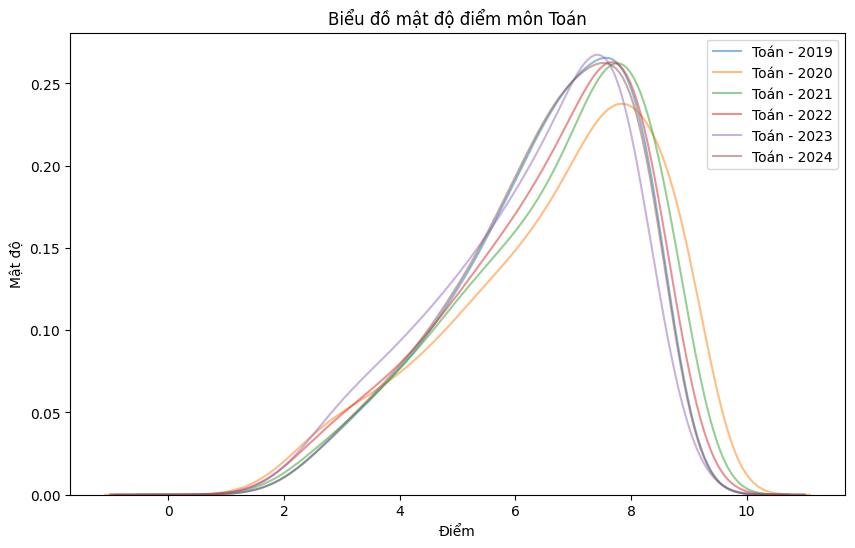

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

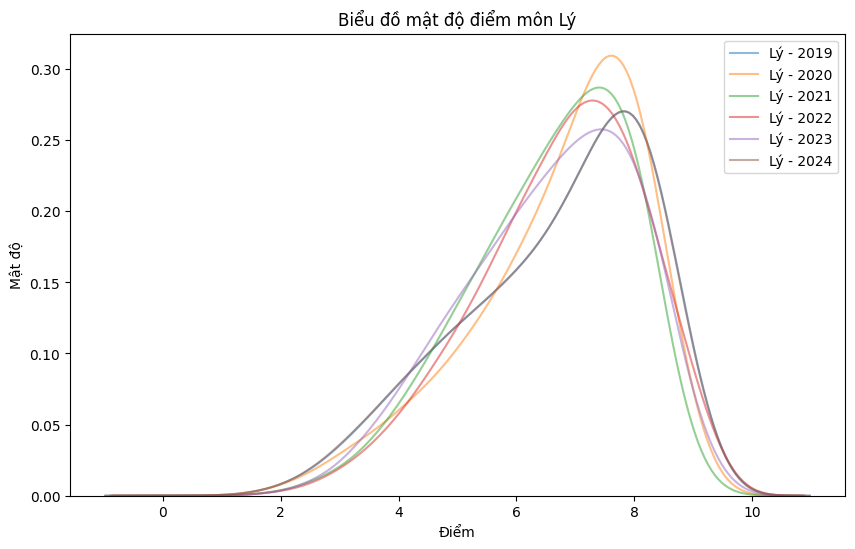

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

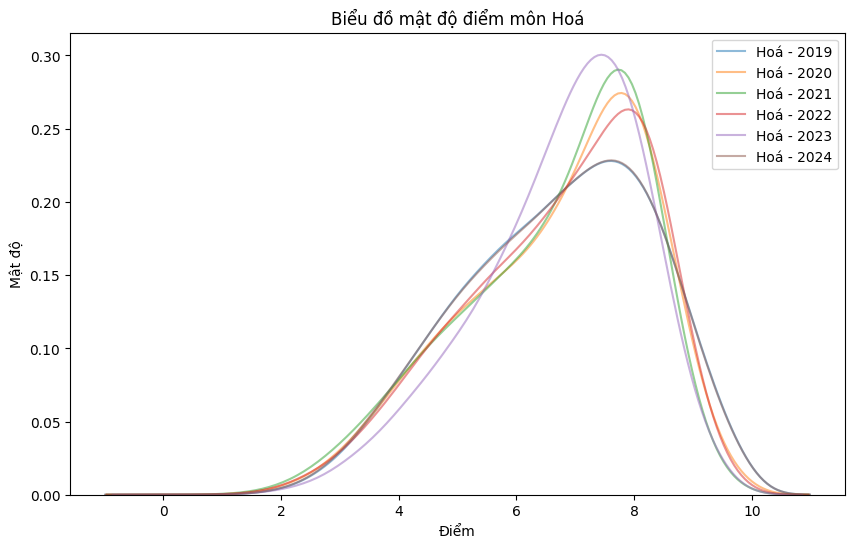

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

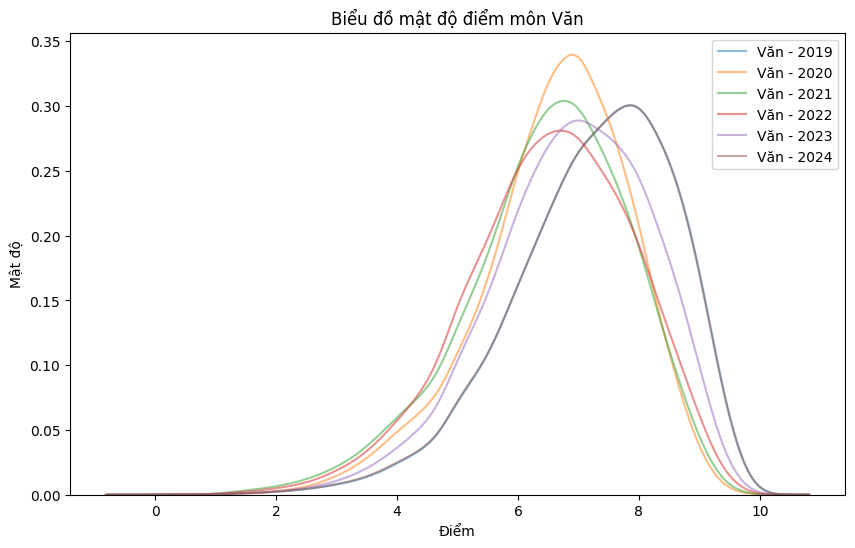

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

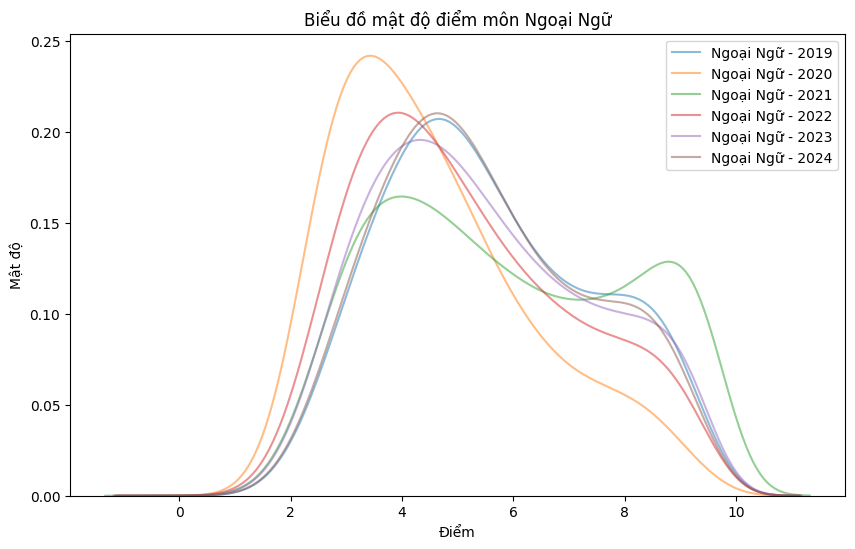

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

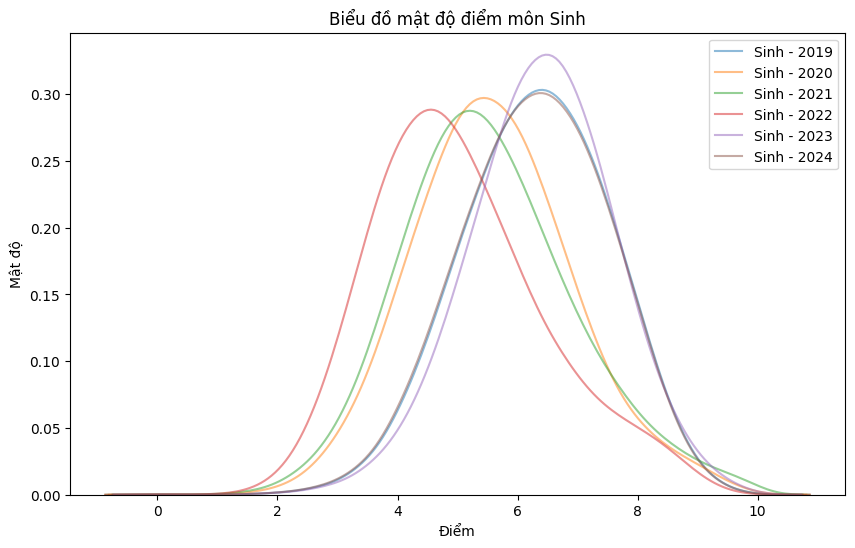

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

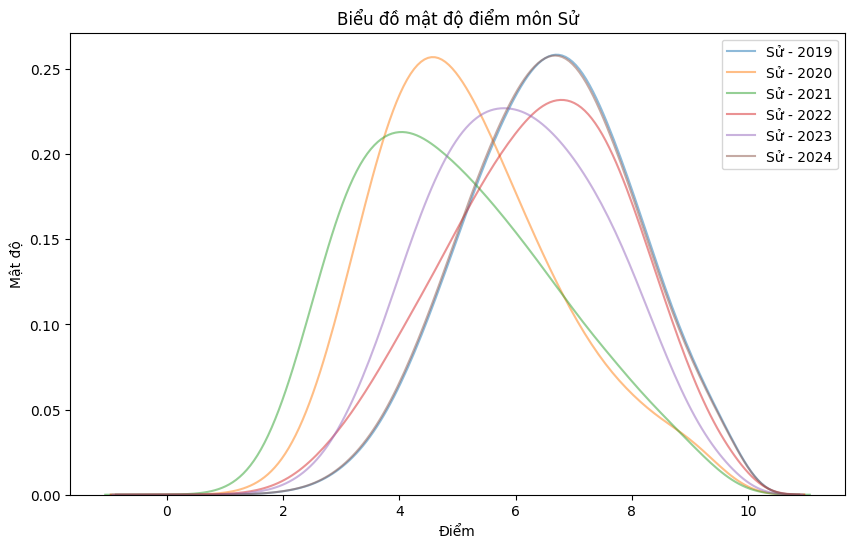

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

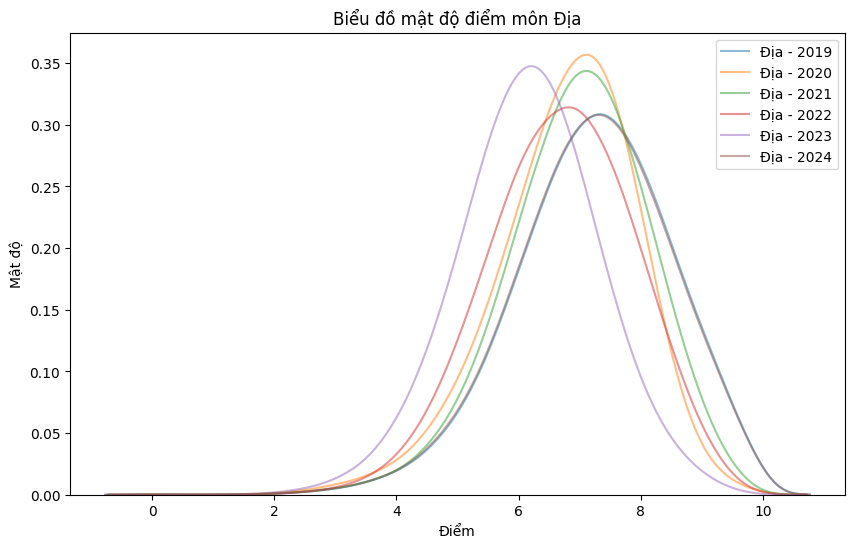

C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3152343665.py:21: UserWarning:



Supp

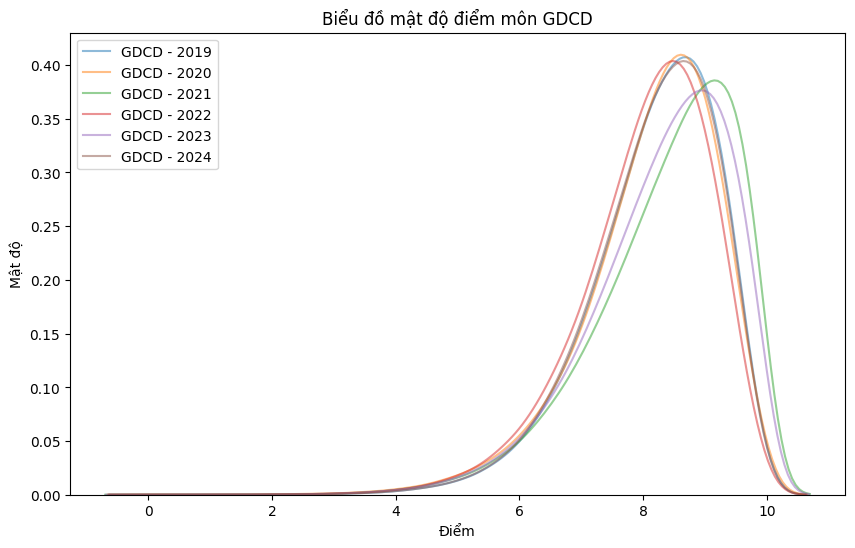

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = {
    2019: r'..\Data\diem_thi_2019.csv',
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}

mon_hoc = ['Toán', 'Lý', 'Hoá', 'Văn', 'Ngoại Ngữ', 'Sinh', 'Sử', 'Địa', 'GDCD']

def plot_kde_by_year_and_subject(subject, start_year, end_year):
    plt.figure(figsize=(10, 6))

    for year in range(start_year, end_year + 1):
        df = pd.read_csv(files[year])
        sns.kdeplot(data=df[subject], label=f'{subject} - {year}', alpha=0.5, kernel='epanechnikov', bw_method=0.2)

    plt.title(f'Biểu đồ mật độ điểm môn {subject}')
    plt.xlabel('Điểm')
    plt.ylabel('Mật độ')
    plt.legend()
    plt.show()

# Vẽ biểu đồ cho tất cả các môn học từ năm 2019 đến 2024
for mon in mon_hoc:
    plot_kde_by_year_and_subject(mon, 2019, 2024)

# Biểu đồ phân bố điểm theo khối


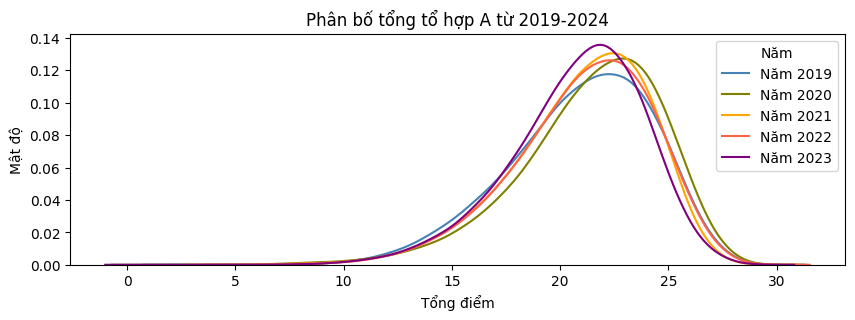

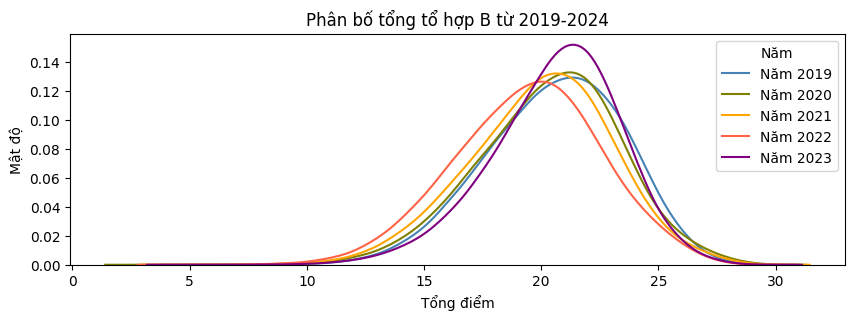

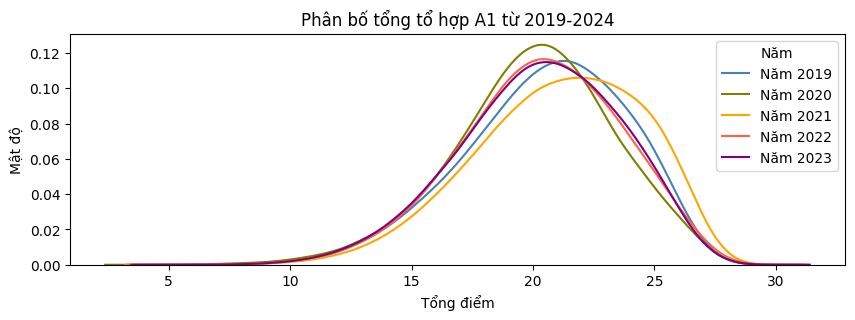

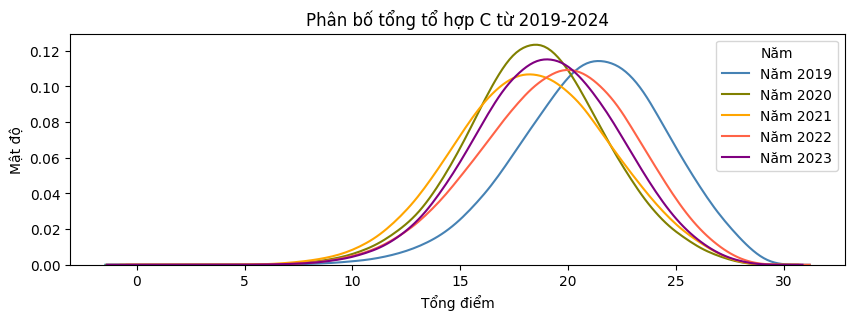

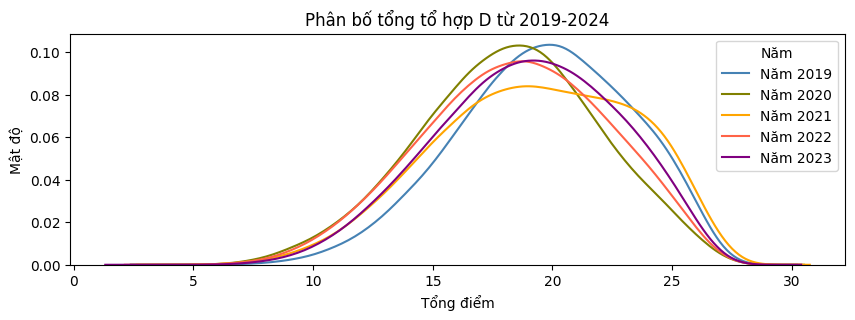

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = {
    
    2019: r'..\Data\diem_thi_2019.csv',
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}

dataframe = {}

for year, file in files.items():
    df = pd.read_csv(file)
    df['year'] = year  # Thêm cột năm
    dataframe[year] = df

df_filtered = pd.concat(dataframe.values(), ignore_index=True)

# Tính tổng điểm các tổ hợp
df_filtered['A'] = df_filtered['Toán'] + df_filtered['Lý'] + df_filtered['Hoá']
df_filtered['A1'] = df_filtered['Toán'] + df_filtered['Lý'] + df_filtered['Ngoại Ngữ']
df_filtered['B'] = df_filtered['Toán'] + df_filtered['Hoá'] + df_filtered['Sinh']
df_filtered['C'] = df_filtered['Văn'] + df_filtered['Sử'] + df_filtered['Địa']
df_filtered['D'] = df_filtered['Toán'] + df_filtered['Văn'] + df_filtered['Ngoại Ngữ']

combinations = ['A', 'B', 'A1', 'C', 'D']
colors = ['steelblue', 'olive', 'orange', 'tomato', 'purple']

# Vẽ biểu đồ KDE
for combo in combinations:
    plt.figure(figsize=(10, 3))
    for year, color in zip(files.keys(), colors):
        data = df_filtered[df_filtered['year'] == year]
        sns.kdeplot(data[combo].dropna(), label=f'Năm {year}', color=color, bw_adjust=2)
    plt.title(f'Phân bố tổng tổ hợp {combo} từ 2019-2024')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()


# Biểu đồ so sánh điểm trung bình của từng môn qua các năm

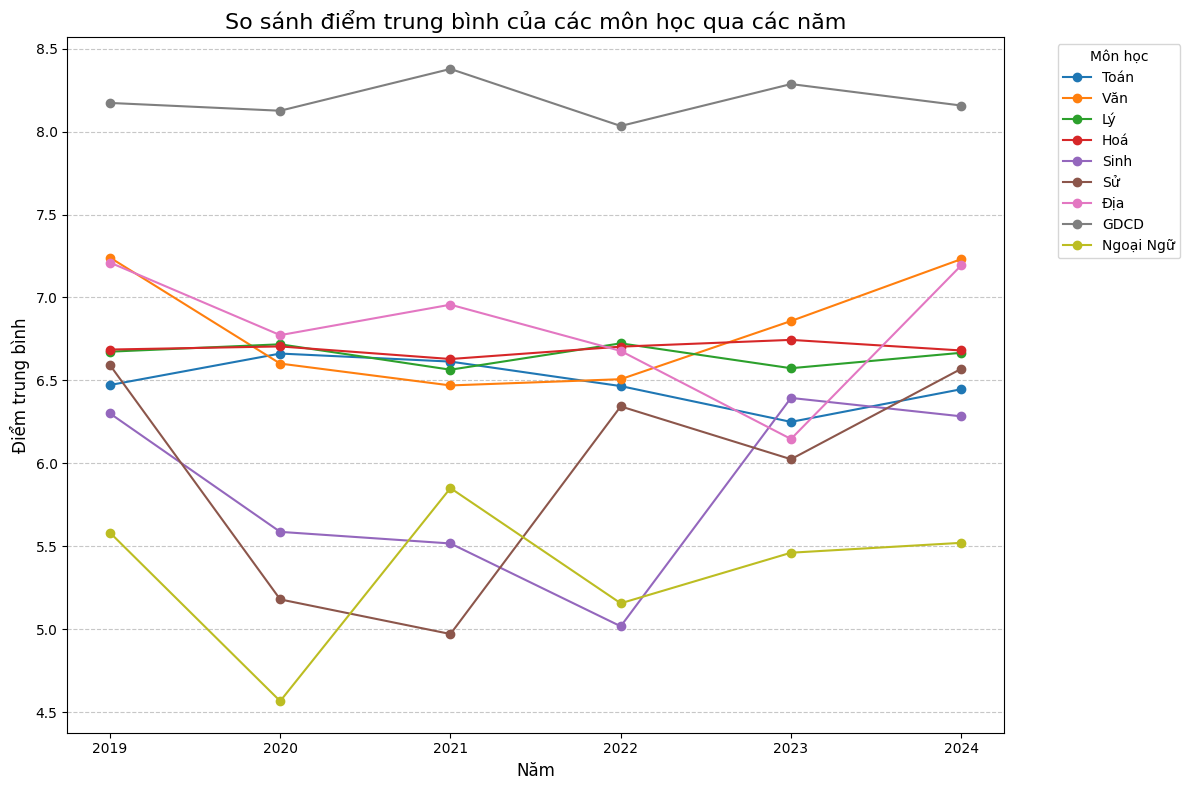

In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến các file CSV
files = {
    2019: r'..\Data\diem_thi_2019.csv',
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}
data_diem = {}

for year, file in files.items():
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(file)
    
    # Tính toán cho từng môn học
    year_data = {}
    for subject in ['Toán', 'Văn', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD', 'Ngoại Ngữ']:
        if subject in df.columns:
            subject_data = df[subject].dropna()
            year_data[subject] = {
                'mean score': subject_data.mean(),
                
            }
    data_diem[year] = year_data

result_df = pd.DataFrame.from_dict(
    {(year, subject): data for year, subjects in data_diem.items() for subject, data in subjects.items()},
    orient='index'
)
result_df.reset_index(inplace=True)
result_df.columns = ['Year', 'Subject', 'Mean Score']


# Tạo dữ liệu cho biểu đồ
subjects = result_df['Subject'].unique()
years = sorted(result_df['Year'].unique())

plt.figure(figsize=(12, 8))

for subject in subjects:
    subject_data = result_df[result_df['Subject'] == subject]
    plt.plot(subject_data['Year'], subject_data['Mean Score'], marker='o', label=subject)

# Thiết lập đồ họa
plt.title('So sánh điểm trung bình của các môn học qua các năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Điểm trung bình', fontsize=12)
plt.xticks(years)
plt.legend(title='Môn học', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Ma trận tương quan giữa các môn học từ năm 2020 - 2024


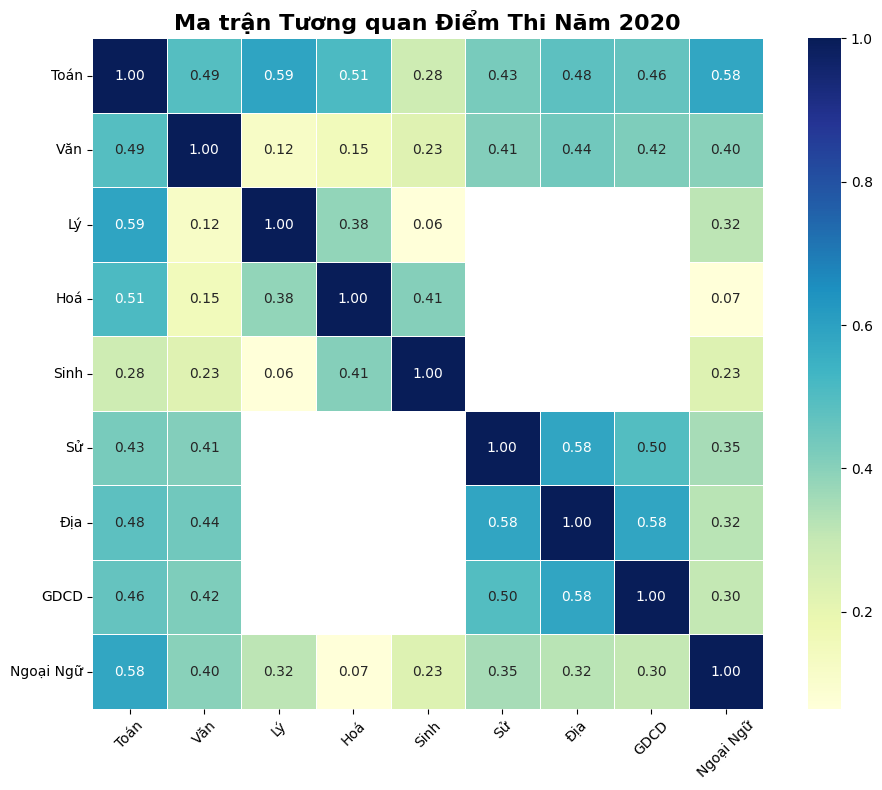

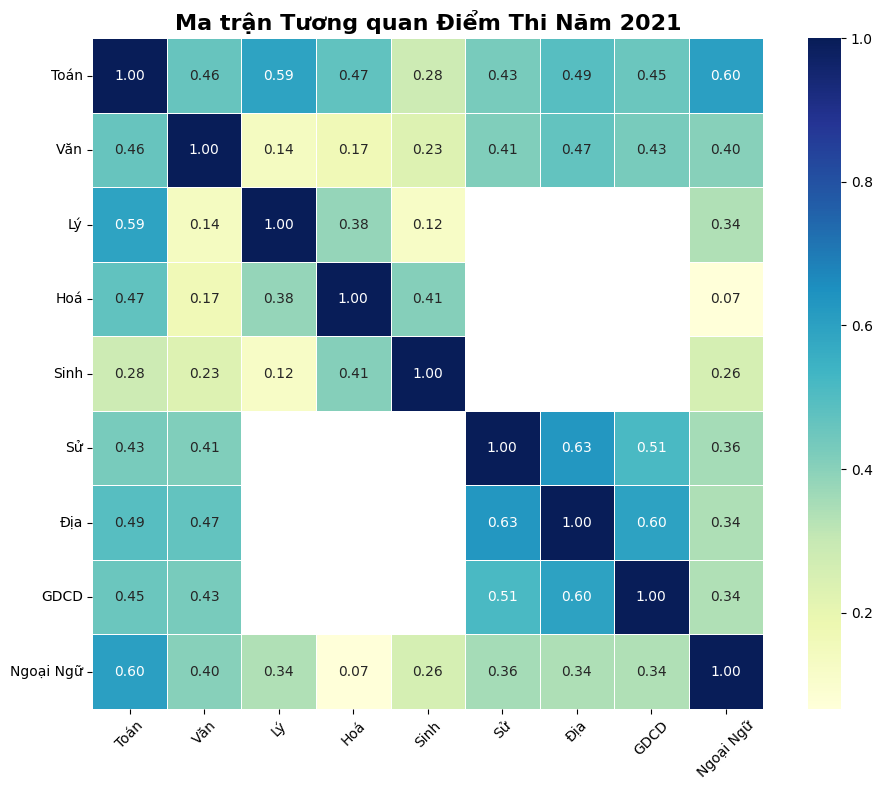

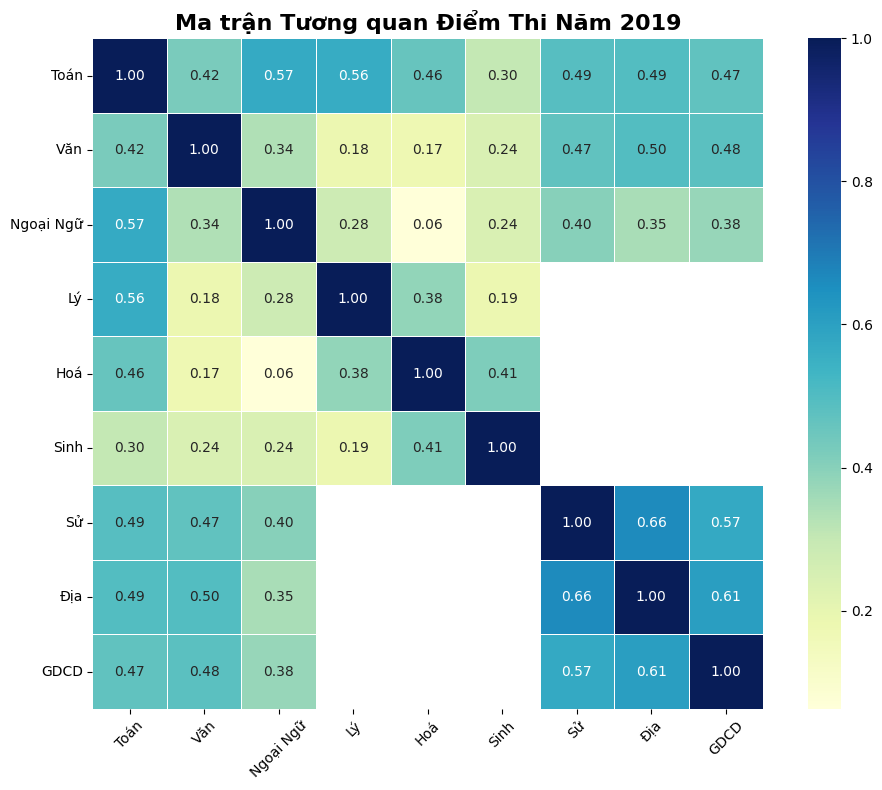

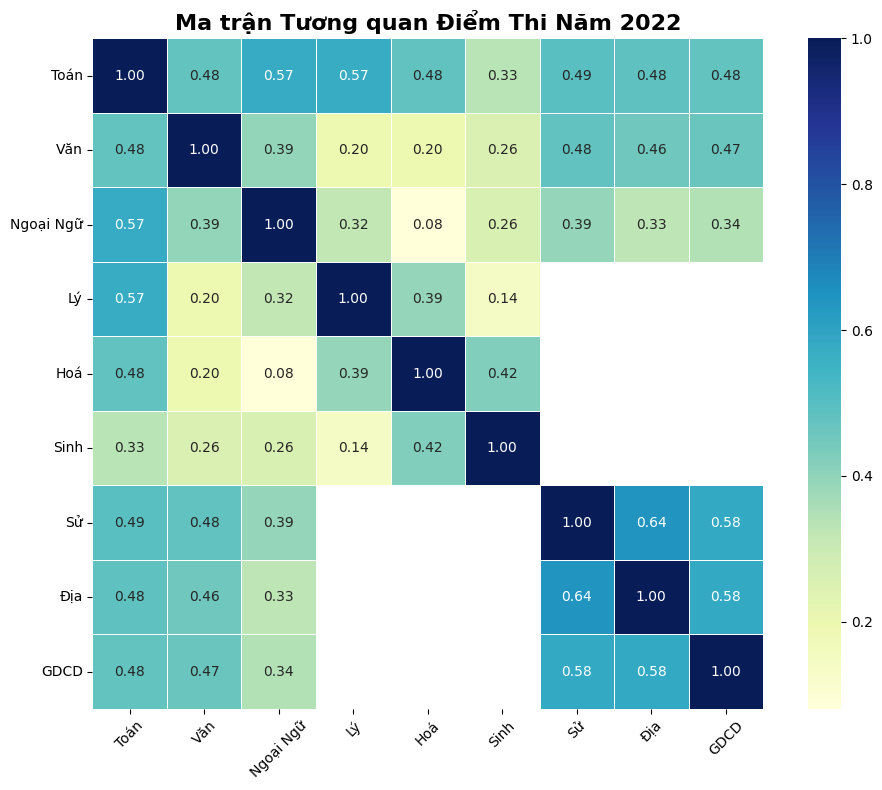

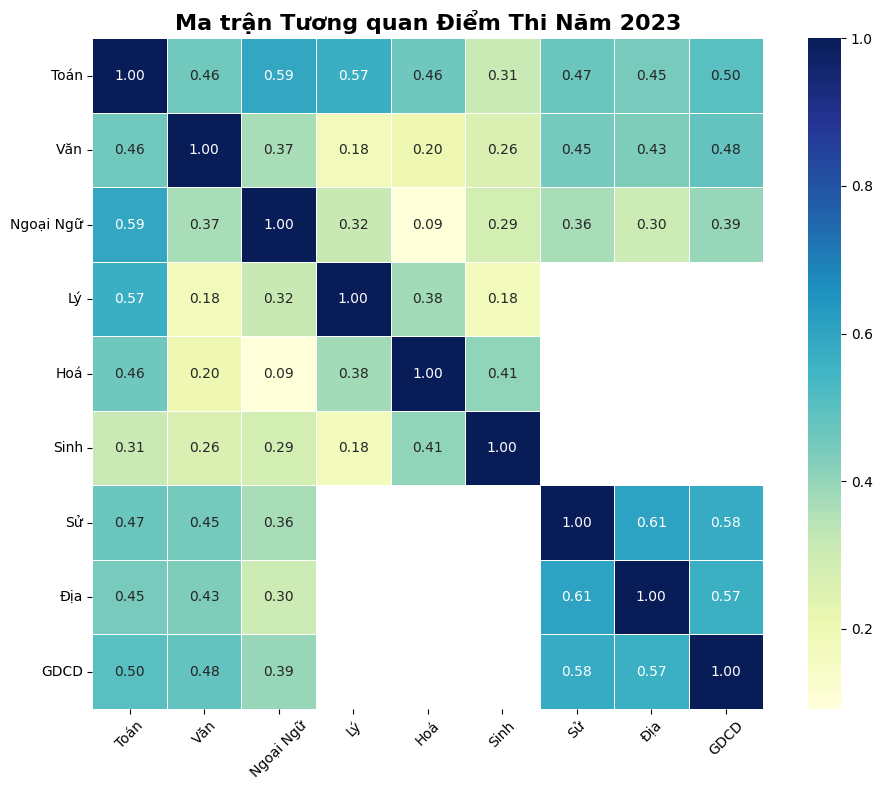

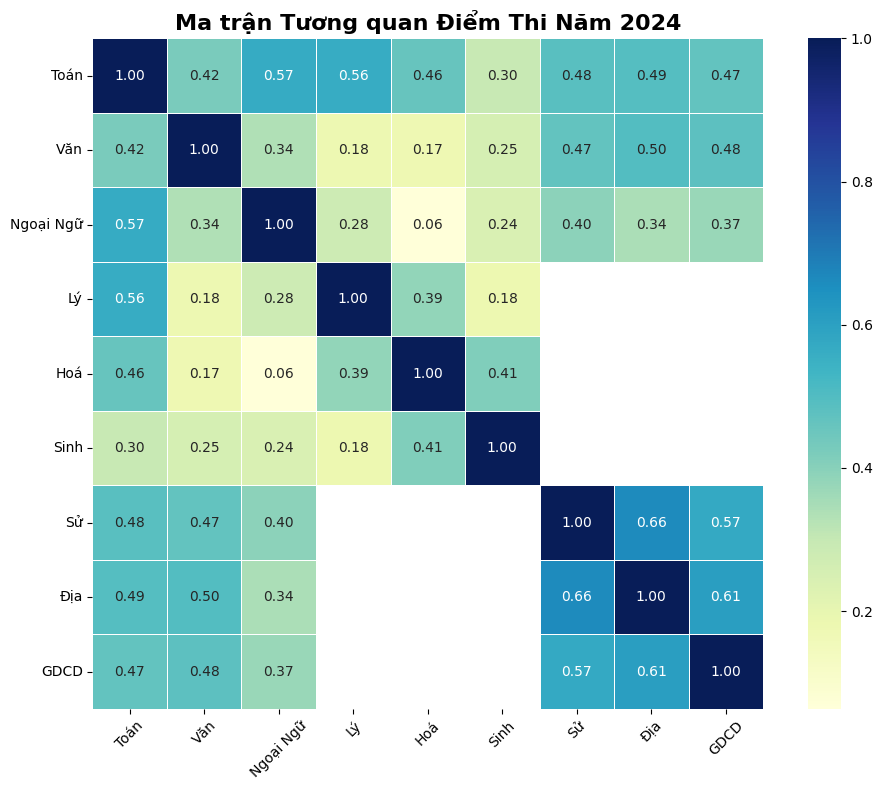

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Định nghĩa các file dữ liệu
files = {
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
}

dataframe = {}

# Đọc dữ liệu và thêm cột năm
for year, file in files.items():
    df = pd.read_csv(file)
    df['year'] = year  # Thêm cột năm
    dataframe[year] = df

# Vẽ ma trận tương quan cho từng năm
for year, df in dataframe.items():
    # Loại bỏ các cột không cần thiết và chỉ giữ lại cột điểm số
    numerical_columns = df.select_dtypes(include=['number']).drop(columns=['Year', 'SBD', 'code', 'year'], errors='ignore')

    # Tính ma trận tương quan
    correlation_matrix = numerical_columns.corr()

    # Vẽ heatmap
    plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
    sns.heatmap(
        correlation_matrix,
        annot=True,               # Hiển thị giá trị trên các ô
        fmt=".2f",                # Định dạng số thập phân
        cmap="YlGnBu",            # Bảng màu (mềm mại hơn)
        cbar=True,                # Hiển thị thanh màu
        square=True,              # Các ô vuông
        linewidths=0.5,           # Độ rộng đường viền giữa các ô
        linecolor='white'         # Màu đường viền
    )

    # Tùy chỉnh nhãn và tiêu đề
    plt.title(f"Ma trận Tương quan Điểm Thi Năm {year}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()  # Đảm bảo không bị tràn nhãn
    plt.show()

files_near = {
    2019: r'..\Data\diem_thi_2019.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}

dataframe1 = {}

# Đọc dữ liệu và thêm cột năm
for year, file in files_near.items():
    df = pd.read_csv(file)
    df['year'] = year  # Thêm cột năm
    dataframe1[year] = df

# Vẽ ma trận tương quan cho từng năm
for year, df in dataframe1.items():
    # Loại bỏ các cột không cần thiết và chỉ giữ lại cột điểm số
    numerical_columns = df.select_dtypes(include=['number']).drop(columns=['sbd', 'province_code', 'year'], errors='ignore')

    # Tính ma trận tương quan
    correlation_matrix = numerical_columns.corr()

    # Vẽ heatmap
    plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
    sns.heatmap(
        correlation_matrix,
        annot=True,               # Hiển thị giá trị trên các ô
        fmt=".2f",                # Định dạng số thập phân
        cmap="YlGnBu",            # Bảng màu (mềm mại hơn)
        cbar=True,                # Hiển thị thanh màu
        square=True,              # Các ô vuông
        linewidths=0.5,           # Độ rộng đường viền giữa các ô
        linecolor='white'         # Màu đường viền
    )

    # Tùy chỉnh nhãn và tiêu đề
    plt.title(f"Ma trận Tương quan Điểm Thi Năm {year}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()  # Đảm bảo không bị tràn nhãn
    plt.show()